### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[260110筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260110%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdateStockDatabase()

2026-02-05 21:57:02.642 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
修改股票資訊。代碼 ＝ 1709：股票名稱 ＝ 和益，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1712：股票名稱 ＝ 興農，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1731：股票名稱 ＝ 美吾華，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1732：股票名稱 ＝ 毛寶，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1736：股票名稱 ＝ 喬山，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1760：股票名稱 ＝ 寶齡富錦，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1786：股票名稱 ＝ 科妍，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2059：股票名稱 ＝ 川湖，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2302：股票名稱 ＝ 麗正，產業類別 ＝ 半導體業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2305：股票名稱 ＝ 全友，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2315：股票名稱 ＝ 神達，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2317：股票名稱 ＝ 鴻海，產業類別 ＝ 其他電子業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2321：股票名稱 ＝ 東訊，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2330：股票名稱 ＝ 台積電，產業類別 ＝ 半導體業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2331：股票名稱 ＝ 精英，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2336：股票名稱 ＝ 致伸，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2341：股票名稱 ＝ 英群，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2352：股票名稱 ＝ 佳世達，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2355：股票名稱 ＝ 敬鵬，產業類別 ＝ 電子零組件業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2369：股

2026-02-05 21:57:03.272 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-26
【略過】週Ｋ：2026-01-26


2026-02-05 21:57:10.433 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-27


2026-02-05 21:57:15.926 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-28


2026-02-05 21:57:21.393 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-29


2026-02-05 21:57:26.785 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-30


2026-02-05 21:57:32.302 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-05 21:57:35.907 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-05 21:57:39.486 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-02-02


2026-02-05 21:57:44.834 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-02-03


2026-02-05 21:57:50.317 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-02-04


2026-02-05 21:57:55.736 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2026-02-05


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤前**：[盤前觀點](https://www.facebook.com/kevinyang20180801/posts/pfbid0KPVafzwjjfu1edGbZLPUNNTp37bVoMiG6g7f5TTSEbFrF4XCXUvFta7W2SRwNTX9l)  
> 整體仍在支撐與壓力區間內震盪。  
> 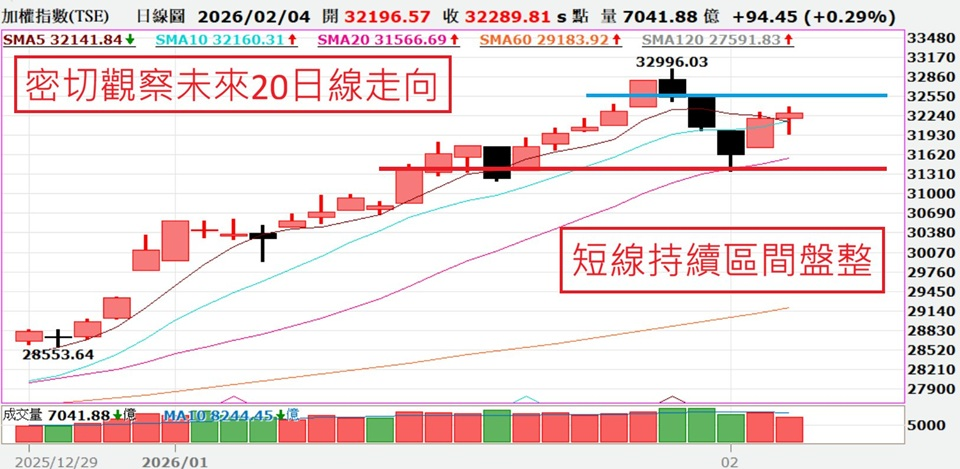  

In [5]:
# 壓力線與支撐線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2026-01-26'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2026-01-30']['Open']
    
    # 支撐線
    support_line_start_date = '2026-01-15'
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2026-01-16']['Close']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)],
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[2.0,2.0]
    
    colors=['xkcd:electric blue','xkcd:red','xkcd:red']

    return seq_of_seq_of_points,linewidths,colors

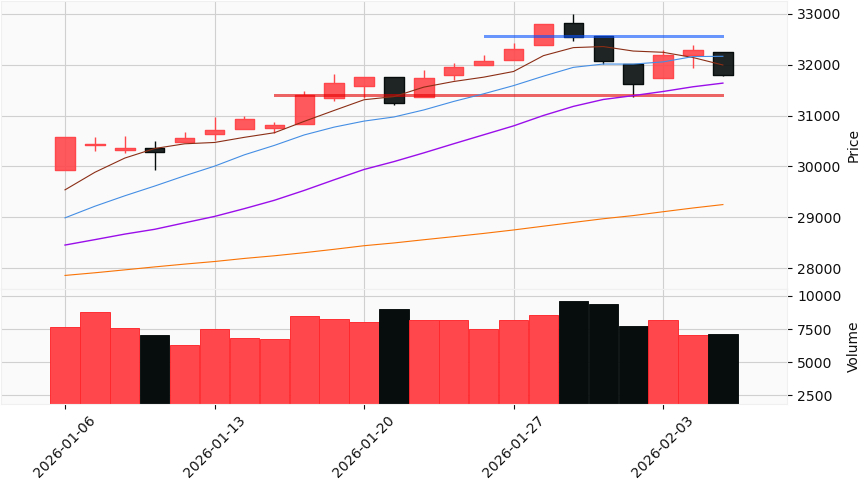

In [6]:
# 收盤：壓力線與支撐線
image = mysys.DrawOnKlineChart('TAIEX','2026-01-06','2026-02-05',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


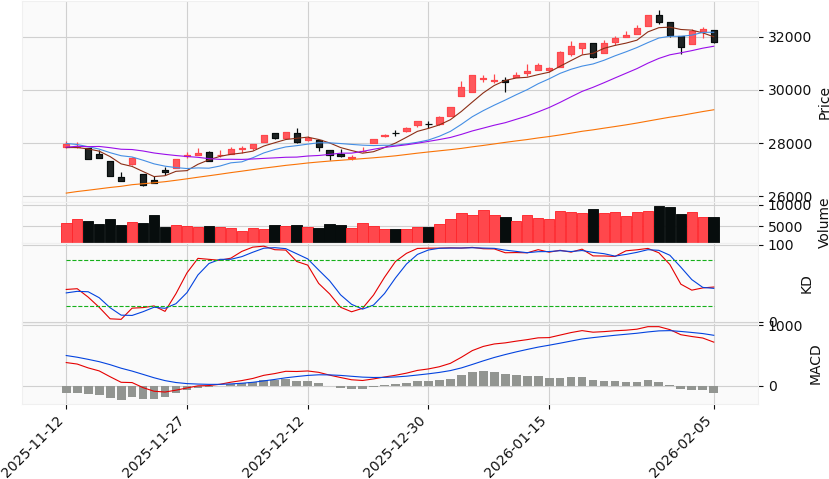

技術分析工具,解盤內容
Ｋ線／Ｋ棒,高檔夜星 : 2026-02-05
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 7151.69億元 ，十日均量 ＝ 8151.07億元）
型態,反轉型態之上升楔形，型態範圍由2025-04-09開始到2026-02-04結束。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-02-05黃金交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-19當週死亡交叉。並且2026-01-26該週在超買區。
整體評價,"價格趨勢 整體仍屬上漲趨勢中的回檔：價格自高檔回落，近一日收在約 31,801 點，短線動能轉弱。均線結構上，中期均線仍上揚，但短期均線已下彎且價格跌破短期均線，顯示短線整理壓力增加。 價量關係 回檔過程中成交量約落在 7,000～9,000 億元區間，未見明顯放量下殺，偏向量縮回檔。先前上漲段量能相對較高、近期量能降溫，代表追價力道轉弱、以高檔換手與整理為主。 支撐與壓力 支撐先看 31,770～31,800 點（近期低點與收盤附近），跌破則看 31,640 點附近（20日線一帶）。壓力先看 32,000 點整數關卡與 32,165 點附近（10日線），再上方為 32,240～32,300 點（短線反彈壓力區）。 KD 指標解讀 KD 目前落在 中低檔約 40～45附近，未進入超賣區，但已從高檔明顯回落，短線偏弱。K 值略高於 D 值且有止跌跡象，代表下跌動能暫緩，但尚未形成強勢翻多訊號。 MACD 指標解讀 DIF 仍在 MACD 線之上，但兩者同步下彎且距離收斂，顯示上漲趨勢動能正在降溫。OSC 灰柱轉為負值且擴大，代表短線偏空動能增強，回檔壓力仍在。 綜合評價 中期趨勢仍偏多，但短線已進入高檔回檔整理，操作上宜先以守支撐、控風險為主。若能守住 31,770～31,800 點並帶量站回 32,000～32,165 點，才有利於回到偏多節奏；反之跌破支撐，回檔可能加深至 31,640 點附近測試。"


In [7]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

解盤內容：


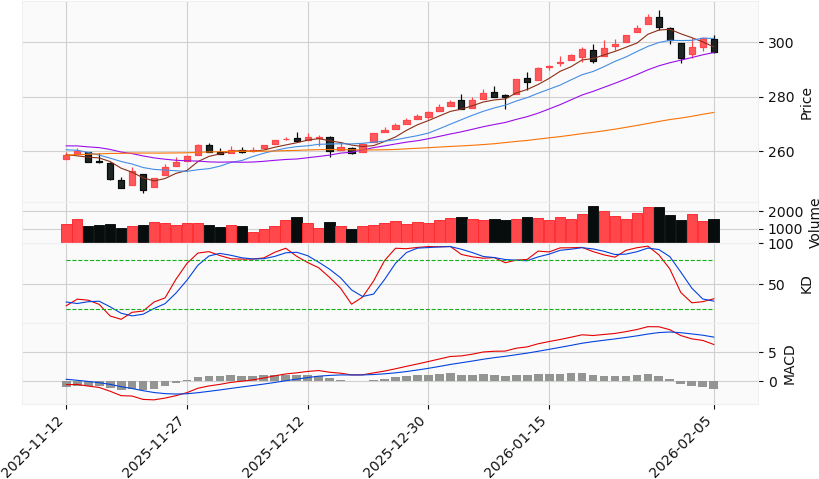

技術分析工具,解盤內容
Ｋ線／Ｋ棒,孕育線／懷抱線 : 2026-02-03
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 1562.0億元 ，十日均量 ＝ 1770.47億元）
型態,反轉型態之頭肩底，型態範圍由2024-11-12開始到2025-12-23結束，估算目標價為346.86點。
移動平均線,5日線下彎、10日線下彎，短期翻空；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-02-05黃金交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-12當週死亡交叉。並且2026-01-26該週在超買區。
整體評價,價格趨勢 整體仍屬上漲趨勢中的回檔：中期均線（20日、60日）維持上行，但短期（5日、10日）已轉為下彎且收盤落在10日線下方。近五日高低點下移，顯示短線多方動能轉弱、進入整理偏弱格局。 價量關係 回檔過程中成交量未明顯失控放大，屬量能中性偏保守，賣壓並非全面宣洩型。惟反彈日量能未能連續放大，代表追價意願不足，短線仍以震盪消化為主。 支撐與壓力 支撐先看約296點（20日線附近且為近期回檔低檔帶），跌破則看約292點（前低區）。壓力先看約298點（5日線附近），再看約301點（10日線附近與近期反彈高點帶），若能站回其上才有利回穩續攻。 KD 指標解讀 K值與D值自低檔回升，且K值已回到D值之上，屬低檔黃金交叉後的修復。但目前仍在50以下，代表反彈偏技術性，尚未轉為強勢多頭段。 MACD 指標解讀 DIF位於MACD線下方，且兩線同步走低，顯示趨勢動能轉弱。柱狀體持續擴大為負值，代表下行動能仍在增強，短線不利快速轉強。 綜合評價 中期多頭架構未破，但短線回檔壓力仍在，屬上漲趨勢中的偏弱整理。操作上宜以296點支撐得失作為強弱分界，未站回301點前，反彈較偏向壓力區的震盪整理。


In [8]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股篩選  

* 選股程序    

In [9]:
results = analysis.screener()

In [10]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

股票代碼 ＝ 6530 ， 股票名稱 ＝ 創威 
股票代碼 ＝ 6189 ， 股票名稱 ＝ 豐藝 
股票代碼 ＝ 1708 ， 股票名稱 ＝ 東鹼 
股票代碼 ＝ 4442 ， 股票名稱 ＝ 竣邦-KY 
股票代碼 ＝ 2903 ， 股票名稱 ＝ 遠百 


* 篩選結果  
  - 倉和(6538)：盤整觀察  
    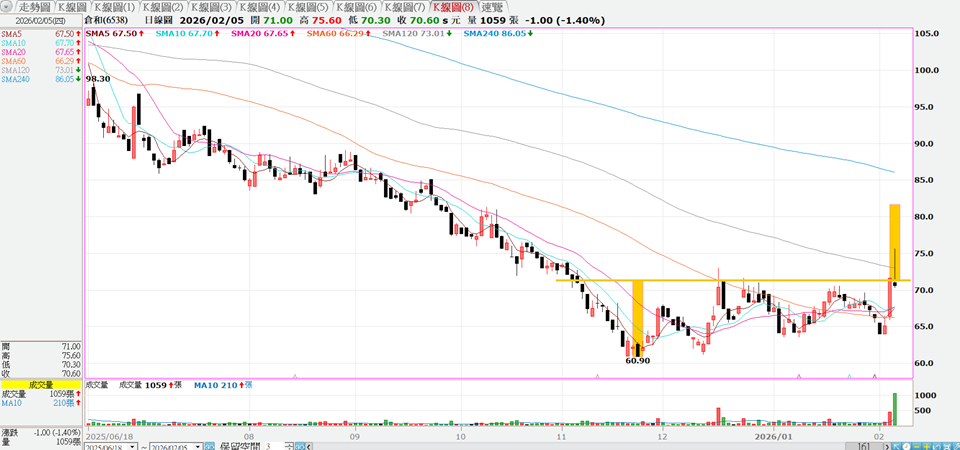  
  - 安可(3615)：多頭回檔  
    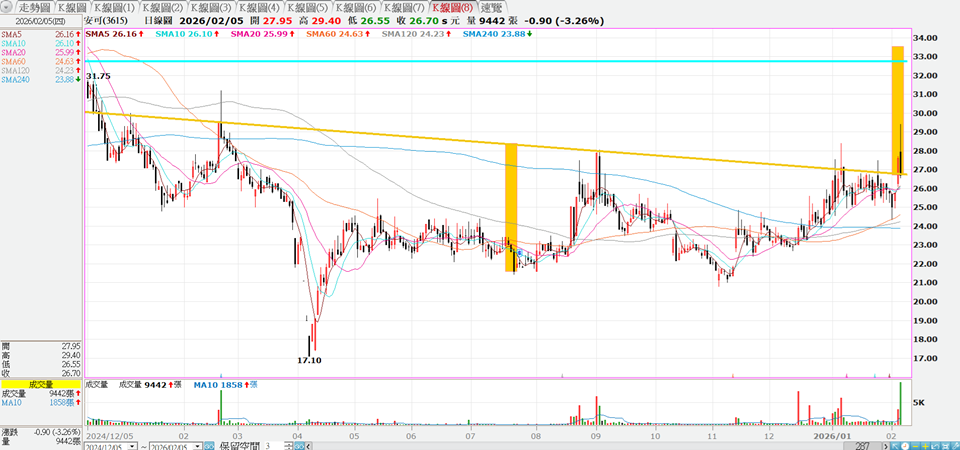  
  - 光鋐(4956)：穩健續漲  
    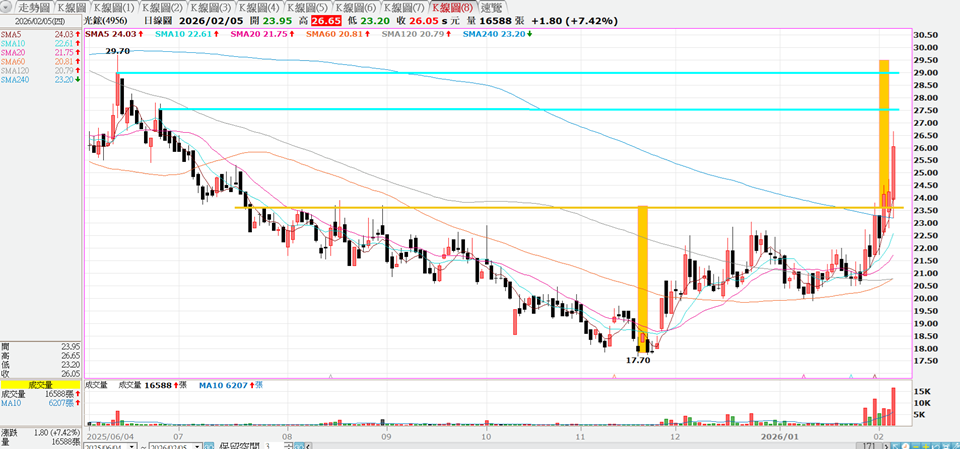  
  - 達能(3686)：穩健續漲  
    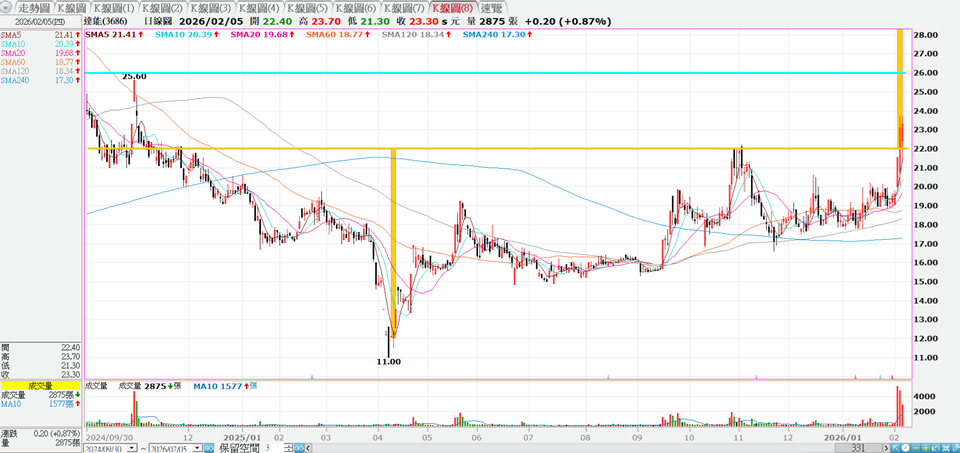  

* 觀察股列表  
  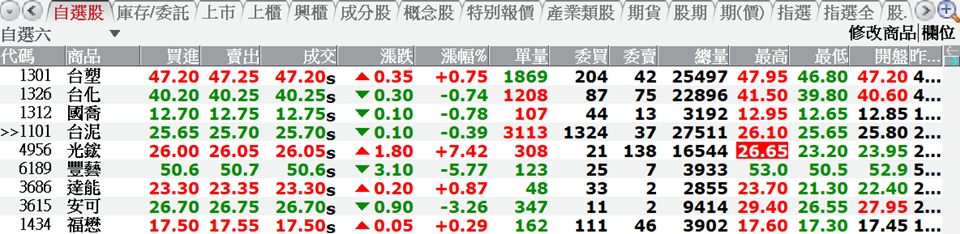  

### 個股解盤  

* 台泥(1101)  
  看法：持續在前波壓力與頸線間盤整，因此這檔先追蹤至今日。     

> **盤後**：量化技術分析  

解盤內容：


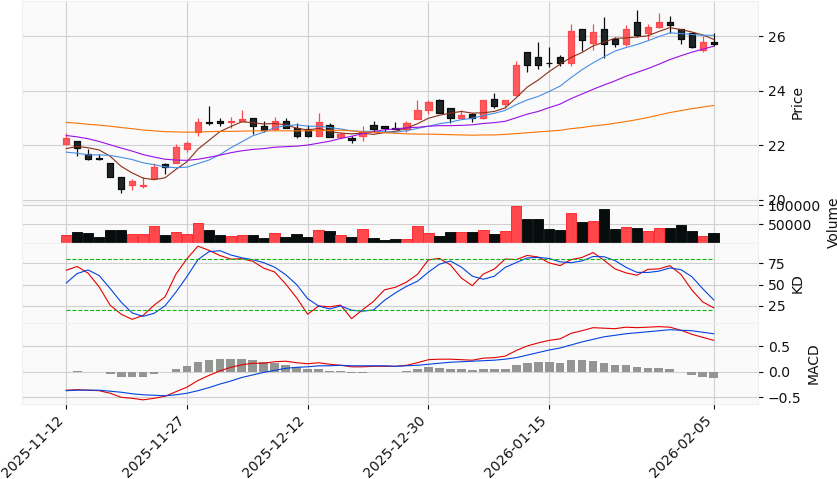

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-01-30
Ｋ線圖,中期為高位階 長期為中位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 27608張 ，十日均量 ＝ 36602張）
型態,底型反轉之底部型態，型態範圍由2025-06-20開始到2026-01-12結束，估算目標價為27.09元。
移動平均線,5日線下彎、10日線走平，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線走平、240日線下彎，長期盤整
ＫＤ指標,於2026-02-02死亡交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-17當週黃金交叉。並且2026-01-26該週在超買區。
整體評價,價格趨勢 短線呈下跌／回檔，近五日收盤由 26.4 元回落至 25.7 元，重心下移。價格已跌破 5 日線並貼近 10 日線，顯示短期轉弱，但仍在 20 日線之上，中期多方結構尚未被破壞。 價量關係 回檔過程中成交量由高檔逐步降溫，屬於縮量回檔，賣壓並未明顯放大。若後續反彈能伴隨量能回升，才有利於止跌轉強的延續性。 支撐與壓力 支撐先看 25.6 元（近期低點區），再看 25.4 元（回檔低點）。壓力先看 26.0～26.1 元（短期均線與近期反彈高點附近），再看 26.25 元與 26.75 元（前高區）。 KD 指標解讀 K、D 同步下彎且 K 低於 D，動能偏弱。指標已接近超賣區（20 附近），短線有機會出現技術性反彈，但在 K 未明確上穿 D 前仍以弱勢反彈視之。 MACD 指標解讀 DIF 仍在 0 軸上方但已下穿 MACD 線，且兩線皆走平偏下，顯示上漲動能轉弱。OSC 灰柱持續擴大為負值，代表下行動能仍在增強，短線不利追價。 綜合評價 目前屬於中期偏多、短線回檔轉弱的型態，關鍵在 25.6～25.4 元支撐是否守穩。若能守住支撐並帶量站回 26.0～26.1 元，才有利於回到偏多節奏；反之跌破 25.4 元，回檔風險將明顯升高。


In [11]:
stock_analysis(analysis,'1101')

> **盤後**：底部反轉交易策略分析  

In [12]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-07-04'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-07-30']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-19'
    bottom_price = range_prices.loc['2025-11-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-19'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

估算目標價為29.30元


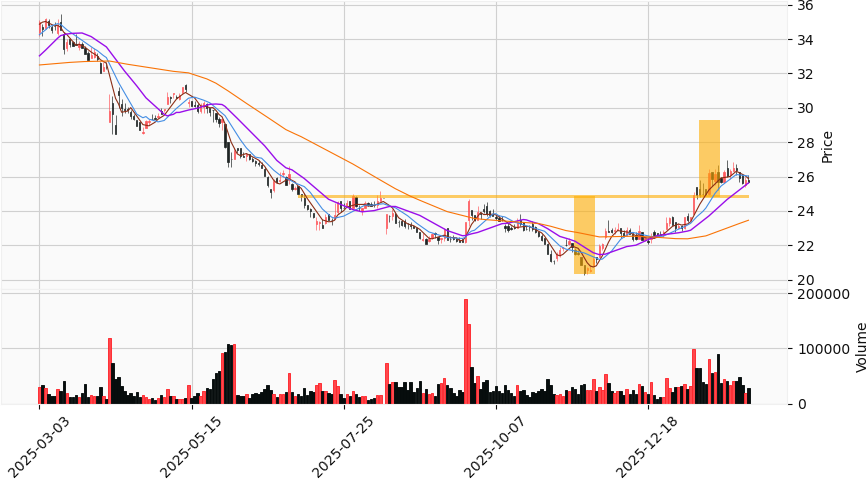

In [13]:
image = mysys.DrawOnKlineChart('1101','2025-03-03','2026-02-05',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-3974)：外資小賣(-6217)、投信中立(-28)、自營大買(+2271)。  
主力小買(+2782)。  
分公司買賣家數差分散(-19)。  
融資大減(-1905)、融券減(-46)。  

* 台塑(1301)  
  看法：弱勢反彈，但關鍵支撐都有守住。這檔會再追蹤一到兩個交易日。    

> **盤後**：量化技術分析  

解盤內容：


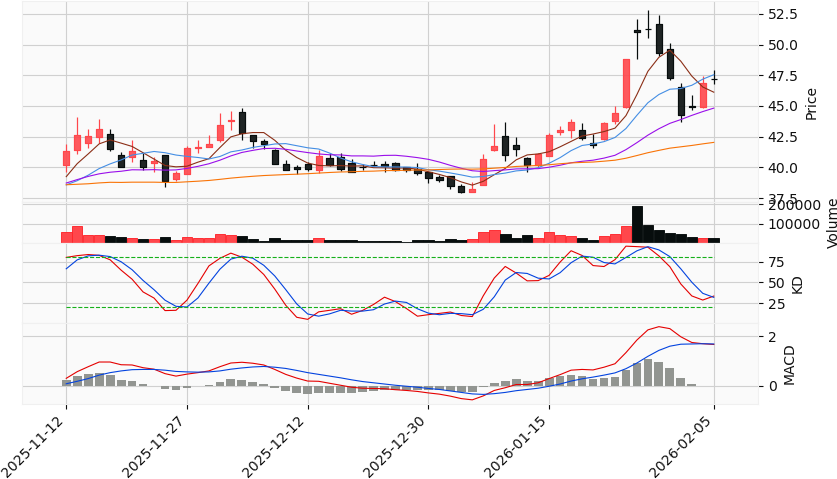

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2026-02-03 , 2026-02-05 十字線 : 2026-02-03 , 2026-02-05 吞噬 : 2026-02-04 孕育線／懷抱線 : 2026-02-03"
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 26194張 ，十日均量 ＝ 66605張）
型態,反轉型態之雙重頂，型態範圍由2025-11-10開始到2026-01-02結束，估算目標價為33.95元。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-02-05黃金交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-12當週黃金交叉。
整體評價,價格趨勢 短線屬「回檔後反彈」格局：先由高檔急跌至 44 元附近後連續回升，最新收在 47.2 元。均線結構呈現短期均線下彎、但中期均線仍上行，顯示短線修正未完全結束、但中期多方架構尚在。 價量關係 下跌段量能偏大、反彈段量能逐日縮小，屬「縮量反彈」型態，追價力道偏保守。若後續上攻仍無法放量，反彈較可能在壓力區遇到賣壓。 支撐與壓力 支撐先看 46.1 元附近（短期均線位置）與 44.8～45.0 元區間（近幾日回檔低點帶）；跌破則支撐下移至 43.7 元（近期波段低點）。壓力先看 47.5～47.95 元（近幾日高點帶），再看 50.1 元（前一波反彈高點）。 KD 指標解讀 K、D 皆自低檔回升但仍在 50 以下，屬弱勢反彈區，動能尚未轉強。短線雖有止跌回穩跡象，但尚未出現明確轉強訊號。 MACD 指標解讀 DIF 仍在 MACD 線之下，且兩線貼近，代表趨勢動能偏弱、仍在修正尾段。柱狀體由正轉負且幅度不大，顯示多方動能收斂、短線以震盪整理看待。 綜合評價 目前屬中期偏多、短線回檔後的技術性反彈，但「縮量反彈 + 動能指標偏弱」使得上方 47.5～47.95 元壓力不易一次突破。操作上可觀察能否站穩 46.1 元並帶量突破 47.95 元，否則較可能在 45～48 元區間震盪。


In [14]:
stock_analysis(analysis,'1301')

> **盤後**：底部反轉交易策略分析  

In [15]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-09-10'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-12-04']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-01-09'
    bottom_price = range_prices.loc['2025-01-09']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-26'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

估算目標價為57.00元


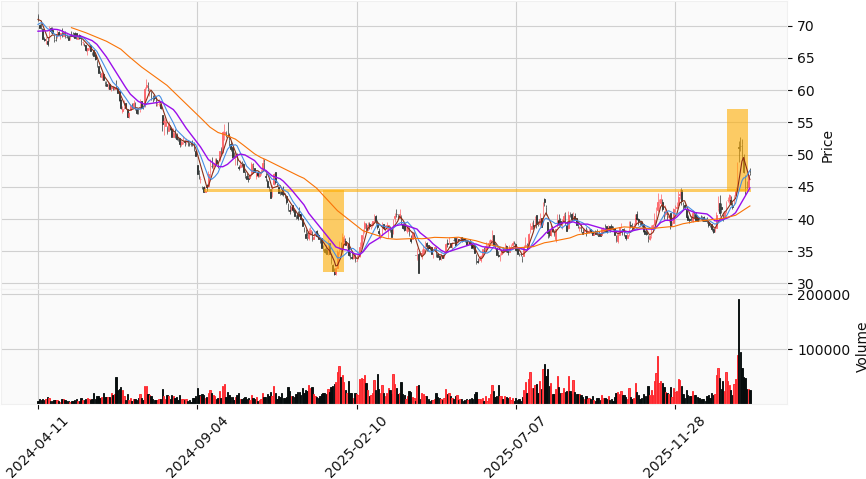

In [16]:
image = mysys.DrawOnKlineChart('1301','2024-04-11','2026-02-05',line_drawing_callback)
display(image)

籌碼面：  
法人小買(+2675)：外資小買(+3323)、投信中立(-5)、自營小賣(-643)。  
主力小買(+2089)。  
分公司買賣家數差分散(-2)。  
融資大減(-827)、融券大增(+251)。  

* 台化(1326)  
  看法：短線轉弱，進入狹幅盤整區間。這檔會再追蹤一到兩個交易日。  

> **盤後**：量化技術分析  

解盤內容：


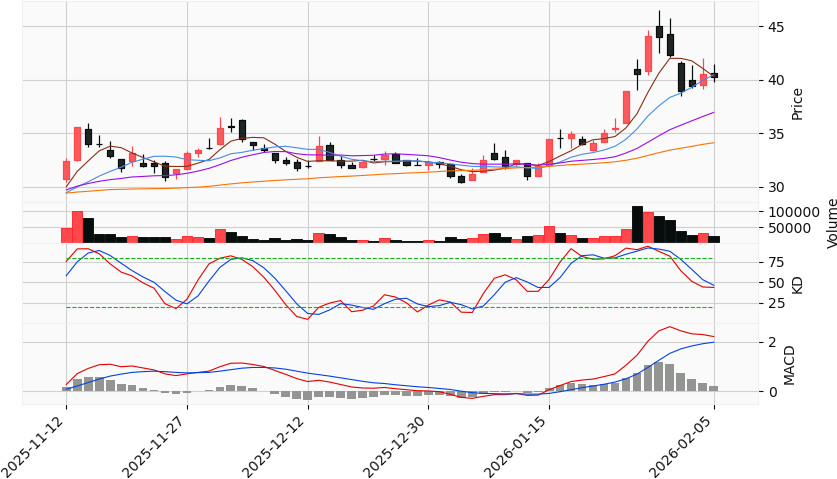

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-02-05 孕育線／懷抱線 : 2026-02-03
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 22982張 ，十日均量 ＝ 55558張）
型態,盤整型態之矩形，型態範圍由2025-08-22開始到2025-11-12結束。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-29死亡交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-12當週黃金交叉。
整體評價,價格趨勢 近期自高點約 45.8元 拉回後進入 回檔整理，近幾日收盤落在 40元上下震盪。短期均線下彎並貼近現價，顯示短線動能轉弱但尚未破壞中期上升結構。 價量關係 1/30 出現明顯放量下跌，屬於高檔轉弱的量價訊號。其後反彈過程量能逐步縮小，近期量縮整理，買盤追價力道偏保守。 支撐與壓力 支撐先看 39.8元（近低點區）與 38.5元（前波急跌低點），跌破則短線整理區間下緣失守。壓力先看 40.3～40.5元（短期均線與近期收盤密集區）及 41.5元（近高點），再上方為 42.0元。 KD指標解讀 K、D同步下行且落在 50以下，顯示短線偏弱、反彈力道不足。尚未進入超賣區（<20），因此目前較像是整理偏弱而非明確止跌訊號。 MACD指標解讀 DIF 仍在 MACD 線之上但持續下彎，兩線正向差距收斂，代表上行趨勢動能正在降溫。OSC 柱狀體連續縮小，顯示多方動能衰退、短線以整理為主。 綜合評價 目前屬於 高檔回檔後的量縮整理偏弱，短線需先站穩 40.3～40.5元 才有利再挑戰 41.5元以上壓力。若跌破 39.8元，回測 38.5元 支撐的機率將提高。


In [17]:
stock_analysis(analysis,'1326')

> **盤後**：底部反轉交易策略分析  

In [18]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-11-11'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-12-04']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-06-23'
    bottom_price = range_prices.loc['2025-06-23']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-26'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

估算目標價為50.10元


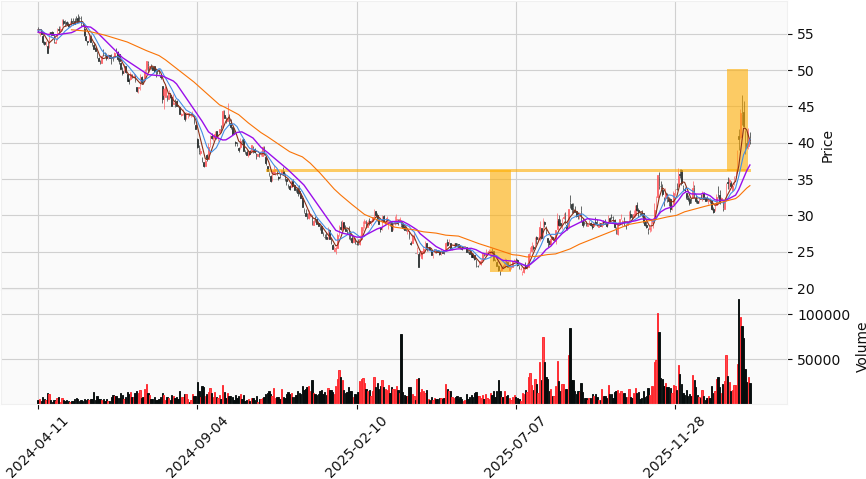

In [19]:
image = mysys.DrawOnKlineChart('1326','2024-04-11','2026-02-05',line_drawing_callback)
display(image)

籌碼面：  
法人大賣(-5655)：外資大賣(-4899)、投信中立(0)、自營大賣(-756)。  
主力小賣(-3599)。  
分公司買賣家數差分散(-81)。  
融資增(+500)、融券中立(-2)。  